In [1]:
import numpy as np
import pandas as pd

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

In [2]:
# data = pd.read_csv('Malware dataset.csv')
data = pd.read_csv('dataset_malwares.csv')
data.columns

Index(['Name', 'e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr',
       'e_minalloc', 'e_maxalloc', 'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs',
       'e_lfarlc', 'e_ovno', 'e_oemid', 'e_oeminfo', 'e_lfanew', 'Machine',
       'NumberOfSections', 'TimeDateStamp', 'PointerToSymbolTable',
       'NumberOfSymbols', 'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment',
       'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders',
       'CheckSum', 'SizeOfImage', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'Malware',
       '

In [3]:
# new_labels = {'malware': 1, 'benign': 0}
# data['classification'] = data['classification'].map(new_labels)
data.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,e_cs,e_lfarlc,e_ovno,e_oemid,e_oeminfo,e_lfanew,Machine,NumberOfSections,TimeDateStamp,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfHeaders,CheckSum,SizeOfImage,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,Malware,SuspiciousImportFunctions,SuspiciousNameSection,SectionsLength,SectionMinEntropy,SectionMaxEntropy,SectionMinRawsize,SectionMaxRawsize,SectionMinVirtualsize,SectionMaxVirtualsize,SectionMaxPhysical,SectionMinPhysical,SectionMaxVirtual,SectionMinVirtual,SectionMaxPointerData,SectionMinPointerData,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,248,34404,6,1236512358,0,0,240,34,523,8,0,54784,189440,0,51316,4096,4294967296,4096,512,6,0,6,0,5,2,1024,295281,274432,2,32832,524288,8192,1048576,4096,0,16,1,0,0,6,0.000000,0,512,0,274,0,188416,0,270336,0,245248,0,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,240,332,5,1365109591,0,0,224,258,267,9,0,205824,139264,0,84654,4096,4194304,4096,512,5,0,0,0,5,0,1024,0,442368,2,33088,1048576,4096,1048576,4096,0,16,1,0,0,5,3.815281,0,8704,0,24124,0,205680,0,339968,0,314880,0,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,256,332,6,1438777028,0,0,224,14,267,6,0,24576,20480,0,27364,256,4194304,4096,4096,4,0,0,0,4,0,4096,0,49152,2,0,1048576,4096,1048576,69632,0,528,1,0,0,6,0.103538,0,4096,0,329,0,24065,0,45056,0,45056,0,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,128,332,7,1354629311,0,0,224,783,267,2,22,34304,28160,297472,16685,4096,4194304,4096,512,4,0,6,0,4,0,1024,14174816,1032192,2,32768,2097152,4096,1048576,4096,0,16,1,14,0,7,0.000000,0,0,0,144,0,638976,0,1003520,0,58880,0,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,0,0,0,64,0,0,0,128,332,7,1386631250,0,0,224,783,267,2,56,8192,89600,512,4416,4096,4194304,4096,512,4,0,1,0,4,0,1024,0,110592,2,0,2097152,4096,1048576,4096,0,16,1,2,0,7,0.000000,0,0,0,24,0,42916,0,73728,0,54784,0,3227516992,0,2,43,0,0,61440,73728,0,90624


In [4]:
data.describe()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,e_ip,e_cs,e_lfarlc,e_ovno,e_oemid,e_oeminfo,e_lfanew,Machine,NumberOfSections,TimeDateStamp,PointerToSymbolTable,NumberOfSymbols,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfHeaders,CheckSum,SizeOfImage,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,Malware,SuspiciousImportFunctions,SuspiciousNameSection,SectionsLength,SectionMinEntropy,SectionMaxEntropy,SectionMinRawsize,SectionMaxRawsize,SectionMinVirtualsize,SectionMaxVirtualsize,SectionMaxPhysical,SectionMinPhysical,SectionMaxVirtual,SectionMinVirtual,SectionMaxPointerData,SectionMinPointerData,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
count,19611.0,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.00000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,19611.000000,19611.00000,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,19611.000000,19611.000000,19611.000000,19611.000000,19611.000000,19611.0,1.961100e+04,19611.0,1.961100e+04,19611.0,1.961100e+04,19611.0,1.961100e+04,19611.0,1.961100e+04,19611.0,1.961100e+04,19611.0,19611.000000,19611.000000,19611.000000,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04,1.961100e+04
mean,23117.0,178.615726,71.660752,49.146958,37.370710,37.032635,64178.739687,10.418490,226.46530,29.689103,107.662434,63.839937,155.523839,92.185610,354.104992,363.403957,220.336750,4852.718678,5.030544,1.283909e+09,6.873241e+06,7.111700e+06,226.173066,5551.12595,300.966243,8.762582,5.119423,1.523875e+06,1.898218e+06,2.687883e+05,8.037910e+06,9.708936e+05,3.106922e+10,4346.067819,874.013972,23.485085,18.022283,52.873744,44.736831,4.769925,14.103921,1.699066e+03,1.154911e+08,1.615545e+06,2.172097,18160.210647,1.074053e+06,7.590221e+03,1.057768e+06,2.376824e+04,1.489712e+06,1.553571e+05,0.744429,5.142675,0.018153,5.030340,1.547795,0.0,2.459628e+04,0.0,2.748368e+04,0.0,7.641715e+05,0.0,9.101676e+05,0.0,2.327726e+07,0.0,3.163632e+09,0.0,6.112437,101.912804,14.131865,3.368566e+05,4.047213e+05,5.555810e+05,1.238834e+06,8.814868e+05
std,0.0,987.200729,1445.192977,1212.201919,864.515405,915.833139,9110.755873,637.116265,1249.68033,1015.303419,1826.995907,1142.682852,1717.331368,1644.797529,3819.329588,4069.272854,70.195798,11558.504580,2.084433,2.945803e+08,1.344465e+08,1.208990e+08,5.986218,9502.47239,86.844903,9.701518,17.762468,5.162412e+07,6.055686e+07,3.068554e+07,1.085113e+08,5.250490e+07,4.602648e+11,1103.142554,1081.272068,925.940606,812.631879,1259.221050,1063.217530,0.811817,932.235146,1.397772e+04,4.943297e+08,3.400173e+07,0.484759,16397.914722,1.377536e+06,7.600085e+04,5.931658e+05,5.731730e+05,6.259495e+07,1.471899e+07,0.436193,6.865930,0.183114,2.084558,1.810216,0.0,5.055981e+05,0.0,5.057358e+05,0.0,9.044052e+06,0.0,2.095545e+07,0.0,2.918776e+08,0.0,5.860332e+08,0.0,7.525158,127.076767,154.958102,2.181191e+07,4.704601e+06,6.772167e+06,5.868961e+07,2.167579e+07
min,23117.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

In [5]:
# class_data = data.drop(columns=['hash', 'classification'])
# x_train, x_test, y_train, y_test = train_test_split(class_data, data['classification'], test_size=0.2, random_state=77)

class_data = data.drop(columns=['Name', 'Machine', 'TimeDateStamp', 'Malware'])
x_train, x_test, y_train, y_test = train_test_split(class_data, data['Malware'], test_size=0.2, random_state=69)
x_train.shape

(15688, 75)

In [14]:
# Naive Bayes
nb = GaussianNB()
nb.fit(x_train, y_train)

y_pred = nb.predict(x_test)

nb_accuracy = accuracy_score(y_test, y_pred)
nb_precision = precision_score(y_test, y_pred)
nb_recall = recall_score(y_test, y_pred)
nb_f1 = f1_score(y_test, y_pred)

print(f"""Naive Bayes scores
      accuracy score: {nb_accuracy}
      precision score: {nb_precision}
      recall score: {nb_recall}
      f1 score: {nb_recall}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")


Naive Bayes scores
      accuracy score: 0.32220239612541424
      precision score: 0.9961977186311787
      recall score: 0.08972602739726028
      f1 score: 0.08972602739726028

Confusion matrix:
[[1002    1]
 [2658  262]]


In [15]:
tree = DecisionTreeClassifier(max_depth=100)
tree.fit(x_train, y_train)

y_pred = tree.predict(x_test)

dt_accuracy = accuracy_score(y_test, y_pred)
dt_precision = precision_score(y_test, y_pred)
dt_recall = recall_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred)

print(f"""Decision tree scores
      accuracy score: {dt_accuracy}
      precision score: {dt_precision}
      recall score: {dt_recall}
      f1 score: {dt_f1}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

Decision tree scores
      accuracy score: 0.9819016059138415
      precision score: 0.9873417721518988
      recall score: 0.9883561643835617
      f1 score: 0.9878487078555537

Confusion matrix:
[[ 966   37]
 [  34 2886]]


In [16]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

rf_accuracy = accuracy_score(y_test, y_pred)
rf_precision = precision_score(y_test, y_pred)
rf_recall = recall_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred)

print(f"""Random forest scores
      accuracy score: {rf_accuracy}
      precision score: {rf_precision}
      recall score: {rf_recall}
      f1 score: {rf_f1}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

Random forest scores
      accuracy score: 0.9903135355595207
      precision score: 0.9884745762711864
      recall score: 0.9986301369863013
      f1 score: 0.993526405451448

Confusion matrix:
[[ 969   34]
 [   4 2916]]


In [17]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

knn_accuracy = accuracy_score(y_test, y_pred)
knn_precision = precision_score(y_test, y_pred)
knn_recall = recall_score(y_test, y_pred)
knn_f1 = f1_score(y_test, y_pred)

print(f"""KNN scores
      accuracy score: {knn_accuracy}
      precision score: {knn_precision}
      recall score: {knn_recall}
      f1 score: {knn_recall}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

KNN scores
      accuracy score: 0.9711955136375223
      precision score: 0.9759240420481519
      recall score: 0.9856164383561644
      f1 score: 0.9856164383561644

Confusion matrix:
[[ 932   71]
 [  42 2878]]


In [24]:
hidden_layers = (500, 250)
activation = 'tanh'
solver = 'adam'

mlp = MLPClassifier(hidden_layer_sizes=hidden_layers, activation=activation, solver=solver)
mlp.fit(x_train, y_train)

y_pred = mlp.predict(x_test)

mlp_accuracy = accuracy_score(y_test, y_pred)
mlp_precision = precision_score(y_test, y_pred)
mlp_recall = recall_score(y_test, y_pred)
mlp_f1 = f1_score(y_test, y_pred)

print(f"""MLP scores
      accuracy score: {mlp_accuracy}
      precision score: {mlp_precision}
      recall score: {mlp_recall}
      f1 score: {mlp_recall}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

MLP scores
      accuracy score: 0.7899566658169768
      precision score: 0.8075117370892019
      recall score: 0.9424657534246575
      f1 score: 0.9424657534246575

Confusion matrix:
[[ 347  656]
 [ 168 2752]]


In [20]:
positive_label = class_data.iloc[0].to_numpy()
negative_label = class_data.iloc[-1].to_numpy()

test_labels = np.array([positive_label, negative_label])
y = np.array([[1], [0]])

svc = SVC()
svc.fit(test_labels, y)

y_pred = svc.predict(x_test)
confusion_matrix(y_test, y_pred)

/home/paul/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/paul/.local/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([[ 709,  294],
       [2752,  168]])

In [21]:
test_data_svm = data.sample(frac=1).reset_index(drop=True)[:3000]
print(test_data_svm['Malware'])
used_data_svm = test_data_svm.drop(columns=['Name', 'Machine', 'TimeDateStamp', 'Malware'])
x_train_svm, x_test_svm, y_train_svm, y_test_svm = train_test_split(used_data_svm, test_data_svm['Malware'], test_size=0.2, random_state=69)

svc = SVC()
svc.fit(x_train_svm, y_train_svm)

y_pred = svc.predict(x_test_svm)
confusion_matrix(y_test_svm, y_pred)

0       1
1       1
2       0
3       0
4       1
       ..
2995    1
2996    1
2997    0
2998    0
2999    0
Name: Malware, Length: 3000, dtype: int64


array([[  1, 149],
       [  0, 450]])

In [22]:
# SVM
svc = SVC(kernel='rbf')
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

svm_accuracy = accuracy_score(y_test, y_pred)
svm_precision = precision_score(y_test, y_pred)
svm_recall = recall_score(y_test, y_pred)
svm_f1 = f1_score(y_test, y_pred)

print(f"""SVM scores
      accuracy score: {svm_accuracy}
      precision score: {svm_precision}
      recall score: {svm_recall}
      f1 score: {svm_recall}\n""")
print(f"Confusion matrix:\n{confusion_matrix(y_test, y_pred)}")

# Train with one of each class

SVM scores
      accuracy score: 0.7486617384654601
      precision score: 0.7476946721311475
      recall score: 0.9996575342465753
      f1 score: 0.9996575342465753

Confusion matrix:
[[  18  985]
 [   1 2919]]


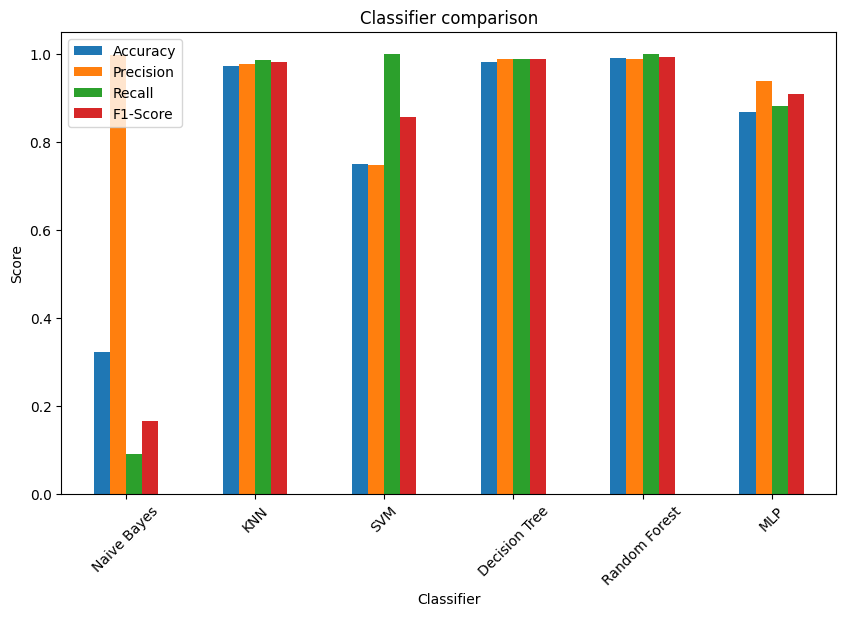

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

results = {
    "Classifier": ["Naive Bayes", "KNN", "SVM", "Decision Tree", "Random Forest", "MLP"],
    "Accuracy": [nb_accuracy, knn_accuracy, svm_accuracy, dt_accuracy, rf_accuracy, mlp_accuracy],
    "Precision": [nb_precision, knn_precision, svm_precision, dt_precision, rf_precision, mlp_precision],
    "Recall": [nb_recall, knn_recall, svm_recall, dt_recall, rf_recall, mlp_recall],
    "F1-Score": [nb_f1, knn_f1, svm_f1, dt_f1, rf_f1, mlp_f1]
}
df_results = pd.DataFrame(results)

##Code to display the results
df_results.plot(kind='bar', x='Classifier', figsize=(10, 6))
plt.title('Classifier comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_238725/2332541769.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')


Text(0.5, 1.0, 'Features importance')

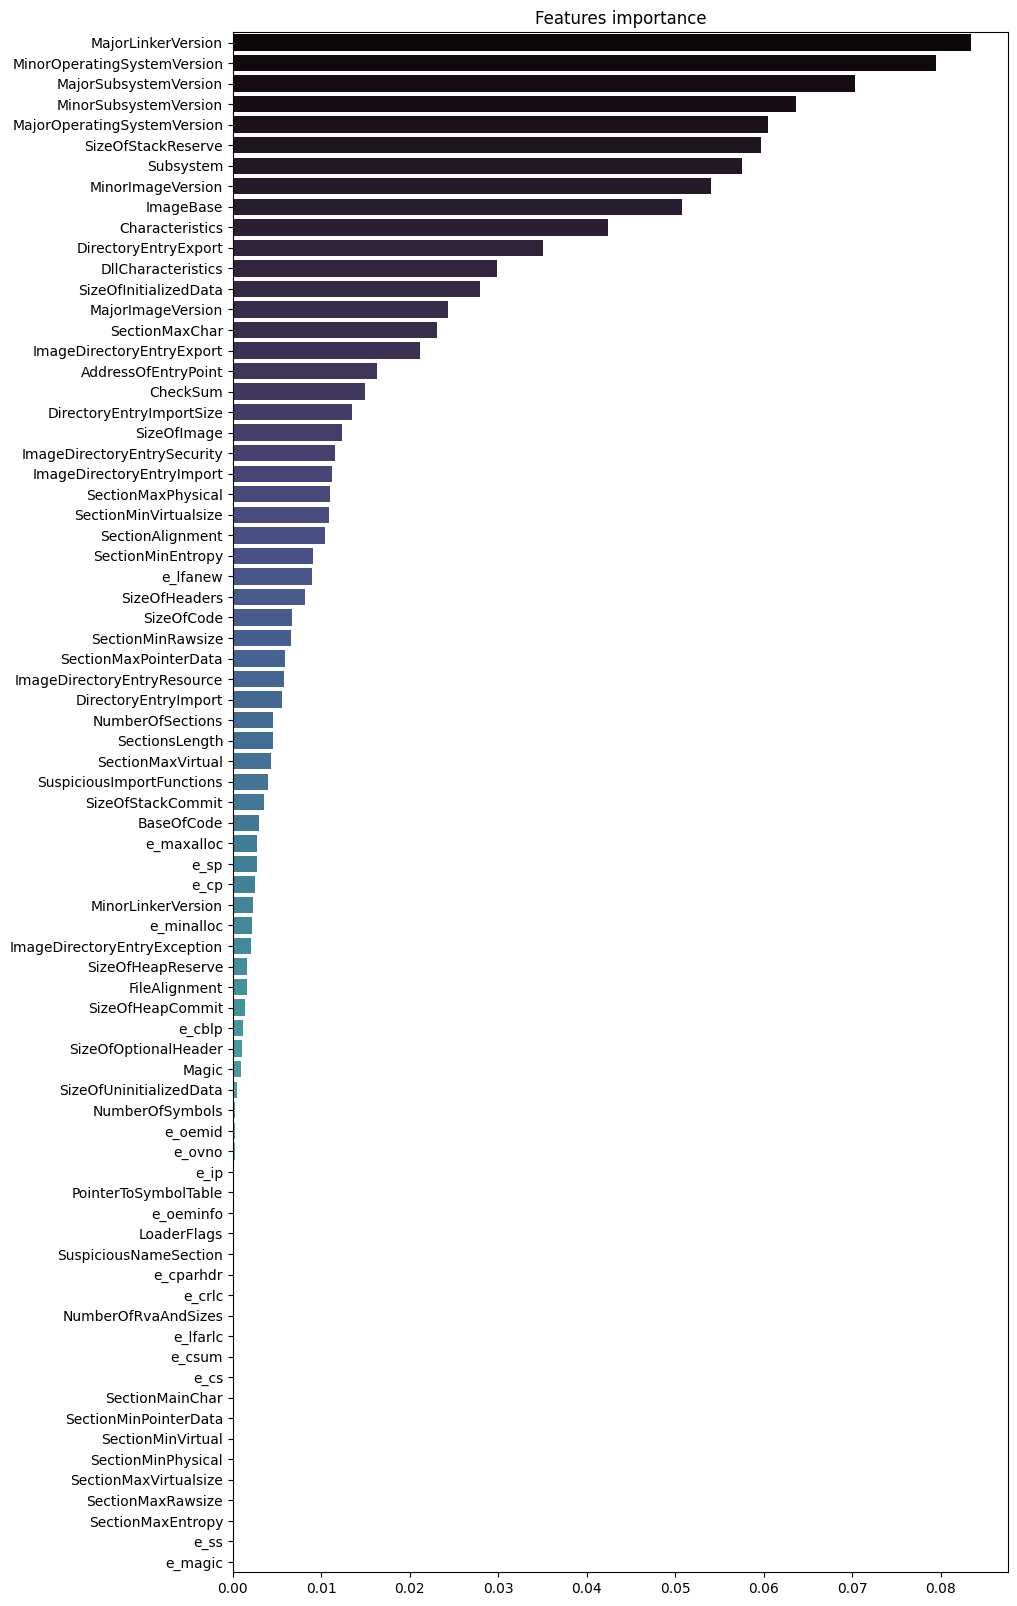

In [28]:
# Feature importance
importance = rf.feature_importances_
importance_dict = {class_data.columns.values[i]: importance[i] for i in range (len(importance))}
sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])}
plt.figure(figsize=(10, 20))
sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], palette='mako')
plt.title('Features importance')

